# 국토 교통부 자동차 등록 현황 분석 2

## 1. Data Load
### 1.1. Connection 객체 만들기

In [1]:
def getEngine():
    import sqlalchemy
    from urllib import parse
    user = 'team3'
    password = 'Encore_team3@'
    host='192.168.0.95'
    port = 3306
    database = 'team3'
    password = parse.quote_plus(password)
    engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")
    
    try:
        with engine.connect() as connection:
            print("Database connection successful!")
    except Exception as e:
        print(f"Database connection failed: {e}")

    return engine

### 1.2. DB로 부터 Data Load

In [2]:
def loadData(_engine, tb_name):
    import pandas as pd
    return pd.read_sql(tb_name,con=_engine)

In [3]:
_engine = getEngine()

Database connection successful!


In [11]:
# def drawParkWithCar(_engine):
import pandas as pd
df_car = loadData(_engine, 'tb_car')
df_park = loadData(_engine, 'tb_park')

df_car.index = df_car.month.apply(lambda x : x.strftime('%Y-%m'))
df_car.drop(['seq','month'], axis=1, inplace=True)

df_car_2 = df_car.loc[(df_car['gugun'] == '계') ,['sido','totalT']].loc['2024-10']
df_park_group = pd.DataFrame( df_park.loc[:,['Sido','Gugun','Spaces']].groupby('Sido')['Spaces'].sum())

In [18]:
# df_park_group
# df_car_2.set_index('sido',inplace=True)
df_park_group, df_car_2

(      Spaces
 Sido        
 강원     13671
 경기     67552
 경남     24273
 경북     39638
 광주      6633
 대구      7310
 대전      5162
 부산     13080
 서울     15396
 세종      5517
 울산     15727
 인천     26970
 전남     21815
 전북     24281
 충남     16617
 충북      5496,
          totalT
 sido           
 서울    3177864.0
 부산    1553233.0
 대구    1259876.0
 인천    1748504.0
 광주     729183.0
 대전     734476.0
 울산     606251.0
 세종     201704.0
 경기    6617414.0
 충북     947185.0
 충남    1269692.0
 전남    1272882.0
 경북    1550581.0
 경남    1975975.0
 제주     712452.0
 강원     874041.0
 전북    1001256.0)

In [24]:
# df_merged = pd.merge(df_park_group,df_car_2,how='inner', left_index=True , right_index=True)
df_merged['rate'] = df_merged['totalT'] / df_merged['Spaces'] 
df_merged

,Spaces,totalT,rate
강원,13671,874041.0,63.933948
경기,67552,6617414.0,97.960297
경남,24273,1975975.0,81.406295
경북,39638,1550581.0,39.118548
광주,6633,729183.0,109.932610
대구,7310,1259876.0,172.349658
대전,5162,734476.0,142.285161
부산,13080,1553233.0,118.748700
서울,15396,3177864.0,206.408418
세종,5517,201704.0,36.560450


## 2. 분석 

### 2.1. 2024년 10월 시도별 주차 공간 당 등록 차량 수

In [31]:
def drawSido(_df):
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumGothic')
    _df['rate'].plot.bar(rot=0)

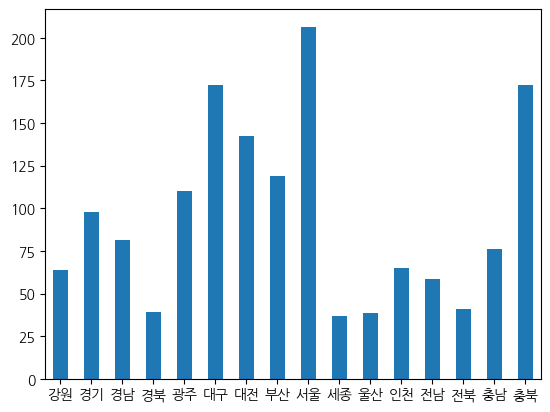

In [32]:
drawSido(df_merged)

In [ ]:
### 